In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

#### Importando os dados

In [2]:
path = "C:/Users/felip/Meu Drive (felipe.bmaia@al.infnet.edu.br)/infnet/developed projects/foursquare_API/novo/data_full_novo.csv"
df_rj = pd.read_csv(path, sep=";")  

In [3]:
df_rj = df_rj[["neighborhood", "latitude", "longitude", "name", "categories"]]

In [4]:
df_rj.shape

(3462, 5)

In [5]:
df_rj.head(3)

neighborhood   latitude  longitude                       name  \
0     Botafogo -22.953341 -43.186139  RefeitÃƒÂ³rio OrgÃƒÂ¢nico   
1     Botafogo -22.956535 -43.192739          Vegana ChÃƒÂ¡cara   
2     Botafogo -22.956195 -43.192417        Naturalie BistrÃƒÂ´   

                        categories  
0  Vegan and Vegetarian Restaurant  
1  Vegan and Vegetarian Restaurant  
2  Vegan and Vegetarian Restaurant

In [29]:
# categories = Vegan and Vegetarian Restaurant', 'Cafes, Snack bars, Sweets', 'Retail', 'Hotels', 'Italian Restaurant', 'Japanese Restaurant', 'Professional Services', 'Various Restaurants', 'Mall and Galleries'
# total 9

#### Localização dos Estabelecimentos no Mapa da Zona Sul e Centro do Rio de Janeiro

In [ ]:
# RJ Geocodes
# latitude = -22.90869
# longitude = -43.21184

In [6]:
# RJ - lat, long
latitude = -22.90869
longitude = -43.21184

In [7]:
map_rj_estab = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng,neighborhood, category in zip(df_rj['latitude'], 
                                 df_rj['longitude'], 
                                 df_rj['neighborhood'],
                                 df_rj['categories']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    if category == 'Vegan and Vegetarian Restaurant':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#78f76d',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)
    if category == 'Italian Restaurant':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)
    if category == 'Various Restaurants':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='#fcba03',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)
    if category == 'Japanese Restaurant':
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#ff3355',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)
    if category == 'Cafes, Snack bars, Sweets':
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple',
            fill=True,
            fill_color='#f98fff',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)
    if category == 'Mall and Galleries':
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='orange',
            fill=True,
            fill_color='#f98fff',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)
    if category == 'Retail':
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='black',
            fill=True,
            fill_color='#f98fff',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)
    if category == 'Hotels':
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='white',
            fill=True,
            fill_color='#f98fff',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab)         
    if category == 'Professional Services':
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='gold',
            fill=True,
            fill_color='#f98fff',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_estab) 
map_rj_estab

### Verificando as Categorias que mais frequentes

In [9]:
df_count = df_rj.groupby(['categories']).size().reset_index(name='Count').sort_values(['Count'], ascending = False)

In [10]:
df_count

categories  Count
6                           Retail    690
5            Professional Services    611
7              Various Restaurants    602
1                           Hotels    565
0        Cafes, Snack bars, Sweets    407
3              Japanese Restaurant    245
2               Italian Restaurant    213
8  Vegan and Vegetarian Restaurant     89
4               Mall and Galleries     40

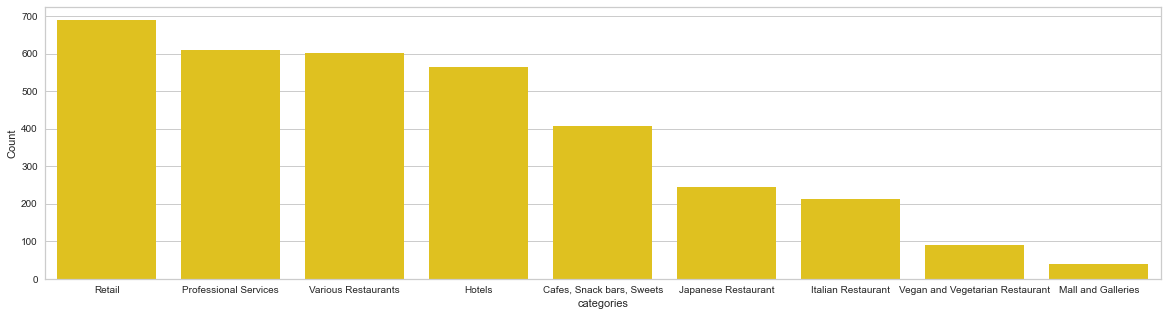

In [24]:
plt.figure(figsize=(20,5))
sns.barplot(x="categories", y="Count", data=df_count, color="gold")
plt.show()

#### Separando as Categorias de Restaurantes

In [26]:
restaurant = df_rj.loc[df_rj['categories'].isin(['Japanese Restaurant','Various Restaurants','Italian Restaurant','Vegan and Vegetarian Restaurant'])]

In [27]:
restaurant.head()

neighborhood   latitude  longitude                       name  \
0     Botafogo -22.953341 -43.186139  RefeitÃƒÂ³rio OrgÃƒÂ¢nico   
1     Botafogo -22.956535 -43.192739          Vegana ChÃƒÂ¡cara   
2     Botafogo -22.956195 -43.192417        Naturalie BistrÃƒÂ´   
3         Leme -22.962374 -43.168412         Gaia Art & CafÃƒÂ©   
4     Botafogo -22.955020 -43.195212                Vegan Vegan   

                        categories  
0  Vegan and Vegetarian Restaurant  
1  Vegan and Vegetarian Restaurant  
2  Vegan and Vegetarian Restaurant  
3  Vegan and Vegetarian Restaurant  
4  Vegan and Vegetarian Restaurant

In [28]:
restaurant.shape

(1149, 5)

#### Categorias de Restaurantes mais frequentes nos bairros especificados

In [47]:
df_count_restaurant = restaurant.groupby(['categories']).size().reset_index(name='Count').sort_values(['Count'], ascending = False)
df_count_restaurant

categories  Count
2              Various Restaurants    602
1              Japanese Restaurant    245
0               Italian Restaurant    213
3  Vegan and Vegetarian Restaurant     89

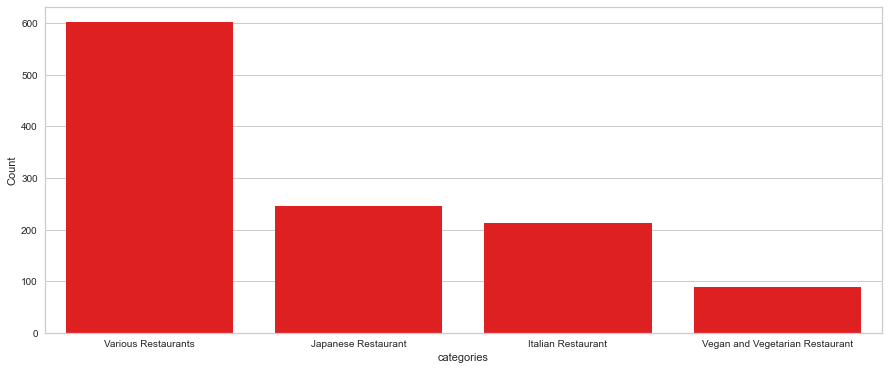

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x="categories", y="Count", data=df_count_restaurant, color="red")
plt.show()

#### Mapa dos Restaurantes distribuídos nos Bairros de Interesse

In [49]:
map_rj_restaurant = folium.Map(location=[latitude, longitude], zoom_start=12.5)
for lat, lng,neighborhood, category in zip(restaurant['latitude'], 
                                 restaurant['longitude'], 
                                 restaurant['neighborhood'],
                                 restaurant['categories']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    if category == 'Vegan and Vegetarian Restaurant':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#78f76d',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_restaurant)
    if category == 'Italian Restaurant':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_restaurant)
    if category == 'Various Restaurants':
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='yellow',
            fill=True,
            fill_color='#fcba03',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_restaurant)
    if category == 'Japanese Restaurant':
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#ff3355',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_restaurant)
   
map_rj_restaurant

##### Clusterização

In [52]:
df_rj.groupby("neighborhood")["categories"].value_counts()

neighborhood  categories               
Botafogo      Retail                       107
              Hotels                        88
              Professional Services         83
              Various Restaurants           82
              Cafes, Snack bars, Sweets     66
                                          ... 
Urca          Professional Services         12
              Retail                        11
              Cafes, Snack bars, Sweets      7
              Hotels                         4
              Japanese Restaurant            2
Name: categories, Length: 142, dtype: int64

#### Importando o dataframe com os valores categóricos transformados em numéricos

In [53]:
path1 = "C:/Users/felip/Meu Drive (felipe.bmaia@al.infnet.edu.br)/infnet/developed projects/foursquare_API/novo/csv_final_cluster.csv"
df = pd.read_csv(path1,sep=";")  

In [54]:
df.shape

(17, 12)

In [55]:
df.head()

neighborhood   latitude  longitude  Cafes, Snack bars, Sweets  Hotels  \
0     Botafogo -22.948860 -43.180114                         66      88   
1       Catete -22.926920 -43.180219                         18      27   
2       Centro -22.904393 -43.183065                         85      58   
3   Copacabana -22.971974 -43.184300                         47      74   
4  Cosme Velho -22.941514 -43.200624                          7      28   

   Italian Restaurant  Japanese Restaurant  Mall and Galleries  \
0                  35                   36                   3   
1                   1                    6                   0   
2                  65                   55                   5   
3                  27                   32                   8   
4                   0                    1                   0   

   Professional Services  Retail  Various Restaurants  \
0                     83     107                   82   
1                     13      47                   13   
2                     85      76                   67   
3                     61      69                   56   
4                     23      25                   19   

   Vegan and Vegetarian Restaurant  
0                               10  
1                                2  
2                               28  
3                               10  
4                                0

In [56]:
df_cluster = df.drop(["neighborhood", "latitude", "longitude"], axis=1)

In [57]:
df_cluster.head()

Cafes, Snack bars, Sweets  Hotels  Italian Restaurant  Japanese Restaurant  \
0                         66      88                  35                   36   
1                         18      27                   1                    6   
2                         85      58                  65                   55   
3                         47      74                  27                   32   
4                          7      28                   0                    1   

   Mall and Galleries  Professional Services  Retail  Various Restaurants  \
0                   3                     83     107                   82   
1                   0                     13      47                   13   
2                   5                     85      76                   67   
3                   8                     61      69                   56   
4                   0                     23      25                   19   

   Vegan and Vegetarian Restaurant  
0                               10  
1                                2  
2                               28  
3                               10  
4                                0

#### Clustering Data
##### Vamos aplicar o algoritmo de ML não supervisionado de agrupamento K-mean para agrupar os locais nos bairros selecionados nas diversas categorias. Com isso teremos uma melhor compreensão das semelhanças e diferenças entre os bairros e gerar mais insights.

In [58]:
std = StandardScaler()
df_std = std.fit_transform(df_cluster)
df_std = pd.DataFrame(df_std, columns=df_cluster.columns)

In [59]:
df_std.head()

Cafes, Snack bars, Sweets    Hotels  Italian Restaurant  \
0                   1.849103  2.231556            1.293259   
1                  -0.252385 -0.251409           -0.663557   
2                   2.680943  1.010426            3.019862   
3                   1.017264  1.661695            0.832832   
4                  -0.733976 -0.210705           -0.721111   

   Japanese Restaurant  Mall and Galleries  Professional Services    Retail  \
0             1.391110            0.225573               2.022344  2.550294   
1            -0.542040           -0.820265              -0.985893  0.246220   
2             2.615438            0.922798               2.108294  1.359856   
3             1.133357            1.968635               1.076898  1.091047   
4            -0.864232           -0.820265              -0.556145 -0.598608   

   Various Restaurants  Vegan and Vegetarian Restaurant  
0             2.281599                         0.686441  
1            -1.076388                        -0.466102  
2             1.551602                         3.279661  
3             1.016270                         0.686441  
4            -0.784389                        -0.754237

#### Encontando o melhor K - Método Elbow

In [60]:
errors = []
for i in range(2,12):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df_std)
  errors.append(kmeans.inertia_)

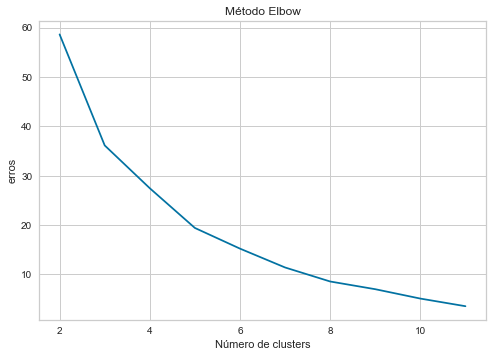

In [62]:
plt.plot(range(2,12), errors)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('erros')
plt.show()

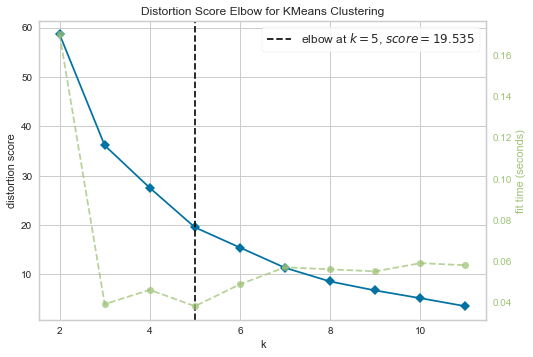

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
kmeans = KMeans()
yellow_visualizer = KElbowVisualizer(kmeans, k=(2,12))
yellow_visualizer.fit(df_std)
yellow_visualizer.show()

#### Método da Silhueta

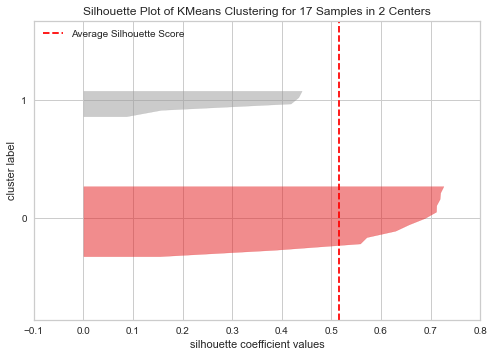

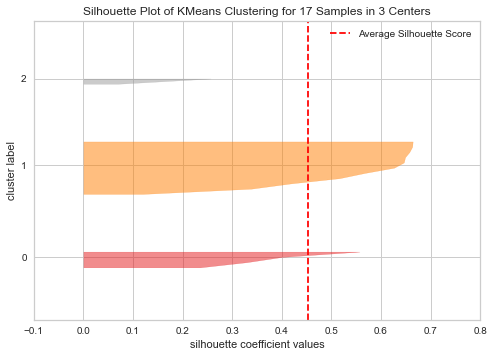

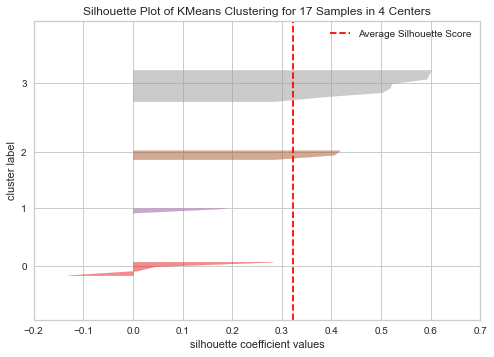

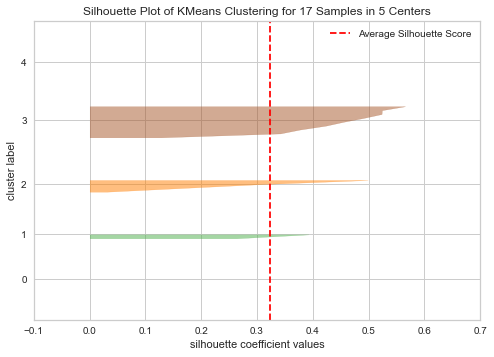

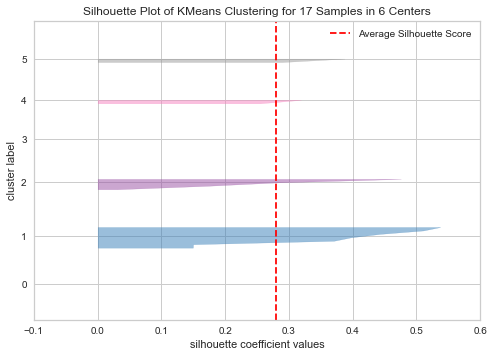

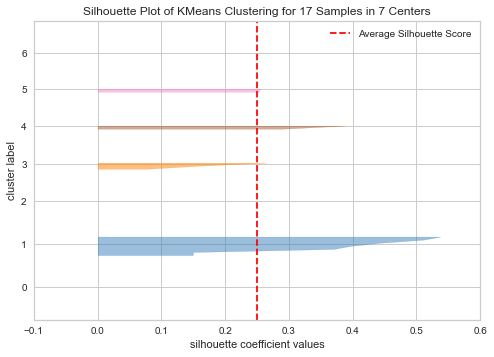

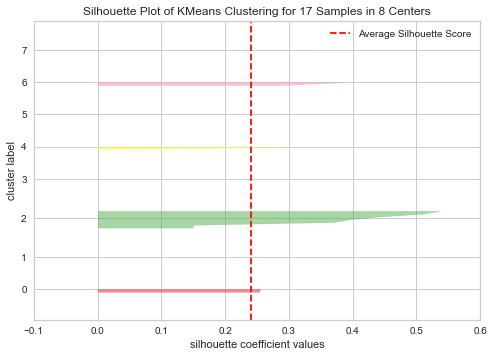

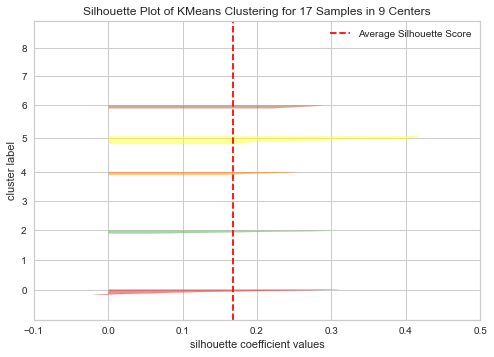

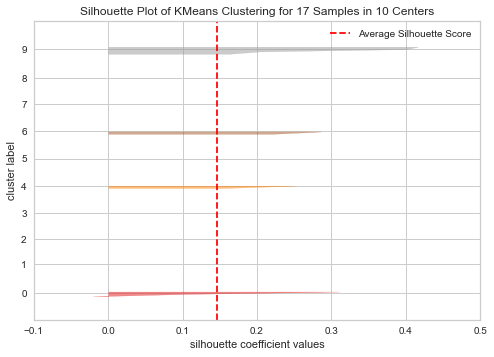

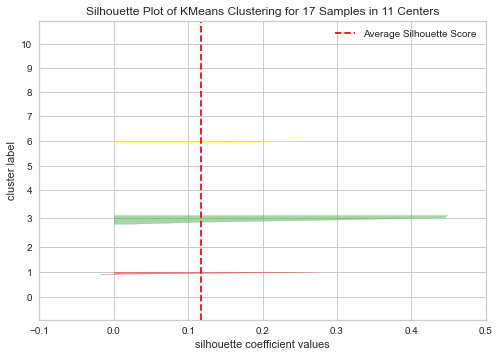

In [64]:
for i in range(2,12):
  kmeans = KMeans(n_clusters=i)
  yellow_visualizer = SilhouetteVisualizer(kmeans)
  yellow_visualizer.fit(df_std)
  yellow_visualizer.show()

#### Kmeans

#### Pelo método da cotovelo vamos assumir o K = 5

In [65]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_std)

In [66]:
clusters

array([4, 0, 2, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 1, 0, 3, 0])

In [67]:
df['cluster'] = clusters

In [68]:
df.head(50)

neighborhood   latitude  longitude  Cafes, Snack bars, Sweets  Hotels  \
0          Botafogo -22.948860 -43.180114                         66      88   
1            Catete -22.926920 -43.180219                         18      27   
2            Centro -22.904393 -43.183065                         85      58   
3        Copacabana -22.971974 -43.184300                         47      74   
4       Cosme Velho -22.941514 -43.200624                          7      28   
5          Flamengo -22.933984 -43.174574                         21      45   
6             Gávea -22.981424 -43.238324                         20      15   
7            Glória -22.918322 -43.173923                          9      23   
8           Humaitá -22.954641 -43.200480                         10       8   
9           Ipanema -22.983956 -43.202216                         34      44   
10  Jardim Botânico -22.968385 -43.228694                          9       7   
11            Lagoa -22.962466 -43.202488                          0       3   
12      Laranjeiras -22.934317 -43.187816                         23      34   
13           Leblon -22.983556 -43.224938                         37      49   
14             Leme -22.961704 -43.166904                         10      49   
15      São Conrado -22.991359 -43.267533                          1       8   
16             Urca -22.954074 -43.167973                          7       4   

    Italian Restaurant  Japanese Restaurant  Mall and Galleries  \
0                   35                   36                   3   
1                    1                    6                   0   
2                   65                   55                   5   
3                   27                   32                   8   
4                    0                    1                   0   
5                    6                    9                   2   
6                    6                   20                   1   
7                    0                    2                   0   
8                    3                    4                   1   
9                   28                   28                   4   
10                   1                    3                   0   
11                   1                    2                   0   
12                   7                   12                   7   
13                  26                   28                   8   
14                   5                    3                   0   
15                   2                    2                   1   
16                   0                    2                   0   

    Professional Services  Retail  Various Restaurants  \
0                      83     107                   82   
1                      13      47                   13   
2                      85      76                   67   
3                      61      69                   56   
4                      23      25                   19   
5                      36      24                   30   
6                      43      58                   53   
7                       4      10                    7   
8                      22      30                   15   
9                      44      42                   40   
10                     23      13                   23   
11                     12      14                   13   
12                     41      45                   53   
13                     42      49                   38   
14                     17      17                   31   
15                     50      53                   37   
16                     12      11                   20   

    Vegan and Vegetarian Restaurant  cluster  
0                                10        4  
1                                 2        0  
2                                28        2  
3                                10        1  
4                                 0        0  
5                               

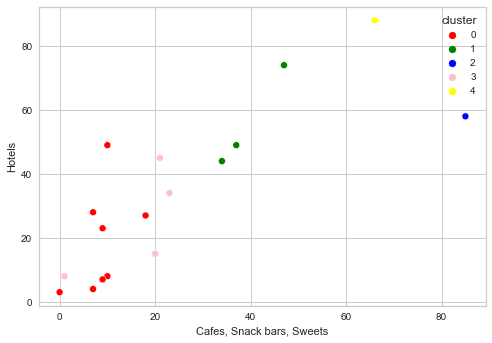

In [69]:
sns.scatterplot(data=df, x='Cafes, Snack bars, Sweets', y='Hotels', hue='cluster', palette=['red', 'green', 'blue', 'pink', 'yellow'])
plt.show()

#### Criando um mapa dos Clusters

In [78]:
map_rj_cluters = folium.Map(location=[latitude, longitude], zoom_start=12.5)
for lat, lng,neighborhood, cluster in zip(df['latitude'], 
                                 df['longitude'], 
                                 df['neighborhood'],
                                 df['cluster']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    if cluster == 0:
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='orange',
            fill=True,
            
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_cluters)
    if cluster == 1:
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple',
            fill=True,
            
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_cluters)
    if cluster == 2:
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_cluters)
    if cluster == 3:
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#ff3355',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_cluters)
    if cluster == 4:
         folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#ff3355',
            fill_opacity=0.7,
            parse_html=False).add_to(map_rj_cluters)        
   
map_rj_cluters

#### Legenda Cluster
###### Cluster 0 - RED
###### Cluster 1 - PURPLE
###### Cluster 2 - BLUE
###### Cluster 3 - GREEN
###### Cluster 4 - ORANGE

In [ ]:
# Dataset 3462 registros

# Italian Restaurant - 213
# Japanese Restaurant - 244
# Cafes, Snack bars, Sweets - 406
# Hotels 565
# Professional Services - 611
# Retail - 690
# Various Restaurants - 602
# Mall - 40
# Vegan Restaurant - 89

#### Explore Data in Each Cluster

#### Cluster 0 - RED

In [374]:
# neighborhoods_merged.loc[neighborhoods_merged['Cluster Labels'] == 0, neighborhoods_merged.columns[[1] + list(range(5, neighborhoods_merged.shape[1]))]]
cluster_0 = neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 0] 

In [376]:
cluster_0.iloc[:,6:11].describe()

1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
count                   1247                  1247                   1247   
unique                     4                     4                      4   
top                   Retail   Various Restaurants  Professional Services   
freq                     640                   482                    502   

            4th Most Common Venue      5th Most Common Venue  
count                        1247                       1247  
unique                          5                          6  
top     Cafes, Snack bars, Sweets  Cafes, Snack bars, Sweets  
freq                          452                        412

#### Cluster 1 - PURPLE

In [377]:
cluster_1 = neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 1] 

In [378]:
cluster_1.iloc[:,6:11].describe()

1st Most Common Venue 2nd Most Common Venue  3rd Most Common Venue  \
count                   2206                  2206                   2206   
unique                     4                     3                      2   
top                   Hotels                Retail  Professional Services   
freq                     946                   894                   1404   

       4th Most Common Venue      5th Most Common Venue  
count                   2206                       2206  
unique                     2                          2  
top      Various Restaurants  Cafes, Snack bars, Sweets  
freq                    1980                       1682

#### Cluster 2 - BLUE

In [379]:
cluster_2 = neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 2] 

In [380]:
cluster_2.iloc[:,6:11].describe()

1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
count                           3                     3                     3   
unique                          1                     1                     1   
top     Cafes, Snack bars, Sweets                Hotels    Italian Restaurant   
freq                            3                     3                     3   

       4th Most Common Venue 5th Most Common Venue  
count                      3                     3  
unique                     1                     1  
top      Japanese Restaurant    Mall and Galleries  
freq                       3                     3

#### Cluster 3 - GREEN

In [381]:
cluster_3 = neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 3]

In [369]:
cluster_3.iloc[:,6:11].describe()

1st Most Common Venue      2nd Most Common Venue 3rd Most Common Venue  \
count                      5                          5                     5   
unique                     1                          1                     1   
top      Various Restaurants  Cafes, Snack bars, Sweets                Hotels   
freq                       5                          5                     5   

       4th Most Common Venue 5th Most Common Venue  
count                      5                     5  
unique                     1                     1  
top       Italian Restaurant   Japanese Restaurant  
freq                       5                     5

#### Cluster 4 - ORANGE

In [382]:
cluster_4 = neighborhoods_merged[neighborhoods_merged['Cluster Labels'] == 4] 

In [383]:
cluster_4.iloc[:,6:11].describe()

1st Most Common Venue      2nd Most Common Venue 3rd Most Common Venue  \
count                      1                          1                     1   
unique                     1                          1                     1   
top                   Hotels  Cafes, Snack bars, Sweets    Italian Restaurant   
freq                       1                          1                     1   

       4th Most Common Venue 5th Most Common Venue  
count                      1                     1  
unique                     1                     1  
top      Japanese Restaurant    Mall and Galleries  
freq                       1                     1